In [1]:
import pandas as pd
import seaborn as sns
import scipy.stats as ss
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_local = pd.read_csv("data/processed/fb_local/fb-Qwen2.5-7B.csv")
df_hf = pd.read_csv("data/processed/fb/fb-Qwen2.5-7B.csv")

In [3]:
df_hf['lo_endpoints'] = df_hf['log_odds']
df_hf['lp_start_endpoints'] = df_hf['lp_start']
df_hf['lp_end_endpoints'] = df_hf['lp_end']

df_local['lo_local'] = df_local['log_odds']
df_local['lp_start_local'] = np.log2(df_local['start_prob'])
df_local['lp_end_local'] = np.log2(df_local['end_prob'])


In [4]:
df_hf = df_hf[['condition', 'passage', 'lo_endpoints', 'lp_start_endpoints', 'lp_end_endpoints']]
df_local = df_local[['condition', 'passage', 'lo_local', 'lp_start_local', 'lp_end_local']]


In [5]:
df_merged = pd.merge(df_hf, df_local)

<Axes: xlabel='lo_endpoints', ylabel='lo_local'>

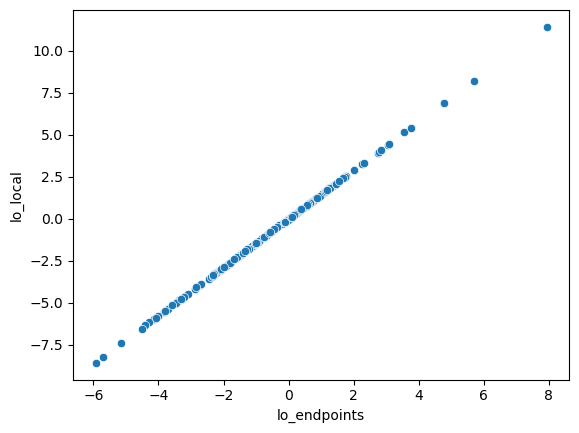

In [6]:
sns.scatterplot(data = df_merged, x = "lo_endpoints", y = "lo_local")

In [7]:
ss.pearsonr(df_merged['lo_local'], df_merged['lo_endpoints'])

PearsonRResult(statistic=0.9999807922919346, pvalue=0.0)